In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns 
#from datetime import datetime
#import numpy as np


In [2]:
!git clone https://github.com/mahmoudfazeli/Perpetua.git

Cloning into 'Perpetua'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (12/12), 3.15 MiB | 1.60 MiB/s, done.


In [3]:
reviews = pd.read_csv('./Perpetua/datasets/hotel_reviews.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateadded             10000 non-null  object 
 2   dateupdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primarycategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalcode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews_date          10000 non-null  object 
 15  reviews_dateseen    

In [4]:
reviews.reviews_rating

0       5.0
1       5.0
2       5.0
3       2.0
4       5.0
       ... 
9995    3.0
9996    4.0
9997    4.0
9998    1.0
9999    1.0
Name: reviews_rating, Length: 10000, dtype: float64

In [5]:
(reviews['reviews_rating'].unique()) ### we found that the reviews are between 1 to 5 

array([5.  , 2.  , 4.  , 3.  , 1.  , 4.8 , 4.6 , 3.55, 4.4 , 4.15, 2.5 ,
       3.95, 2.9 , 3.35, 3.75, 4.5 , 2.1 , 1.65, 3.15, 2.7 , 1.45, 2.75,
       2.3 , 3.5 , 4.25, 1.25, 1.9 , 3.45, 3.25, 4.75])

In [6]:
# define target and features
y = reviews.reviews_rating
X = reviews.drop('reviews_rating', axis = 1, inplace = False)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateadded             10000 non-null  object 
 2   dateupdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primarycategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalcode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews_date          10000 non-null  object 
 15  reviews_dateseen    

In [7]:
reviews['country'].unique()

array(['US'], dtype=object)

In [8]:
reviews.isnull().sum().sort_values(ascending = False)

reviews_userprovince    7295
reviews_usercity        5836
reviews_title              1
reviews_text               1
id                         0
dateadded                  0
websites                   0
sourceurls                 0
reviews_username           0
reviews_sourceurls         0
reviews_rating             0
reviews_dateseen           0
reviews_date               0
province                   0
postalcode                 0
name                       0
longitude                  0
latitude                   0
keys                       0
country                    0
city                       0
primarycategories          0
categories                 0
address                    0
dateupdated                0
location                   0
dtype: int64

In [9]:
# Because I want to make a model based on reviews_text, and reviews_title, then I deleted the rows that are empty
reviews = reviews.dropna(axis=0, subset=['reviews_text'])
reviews = reviews.dropna(axis=0, subset=['reviews_title'])


In [10]:
reviews.isnull().sum().sort_values(ascending = False)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9998 non-null   object 
 1   dateadded             9998 non-null   object 
 2   dateupdated           9998 non-null   object 
 3   address               9998 non-null   object 
 4   categories            9998 non-null   object 
 5   primarycategories     9998 non-null   object 
 6   city                  9998 non-null   object 
 7   country               9998 non-null   object 
 8   keys                  9998 non-null   object 
 9   latitude              9998 non-null   float64
 10  longitude             9998 non-null   float64
 11  name                  9998 non-null   object 
 12  postalcode            9998 non-null   object 
 13  province              9998 non-null   object 
 14  reviews_date          9998 non-null   object 
 15  reviews_dateseen     

 hotels that have less than 5 reviews id                      1164
dateadded               1164
dateupdated             1164
address                 1164
categories              1164
primarycategories       1164
city                    1164
country                 1164
keys                    1164
latitude                1164
longitude               1164
postalcode              1164
province                1164
reviews_date            1164
reviews_dateseen        1164
reviews_rating          1164
reviews_sourceurls      1164
reviews_text            1164
reviews_title           1164
reviews_usercity        1466
reviews_userprovince    1558
reviews_username        1164
sourceurls              1164
websites                1164
location                1164
dtype: int64


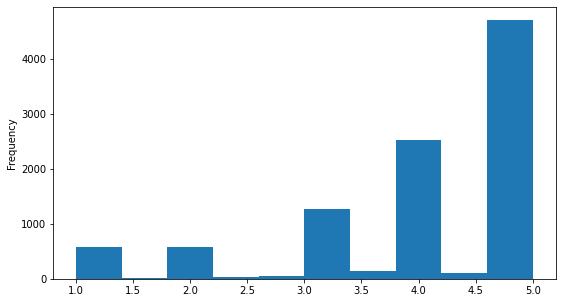

In [11]:
plt.figure(figsize = (9, 5)) 
reviews['reviews_rating'].plot(kind ="hist") 
number_of_reviews = reviews.groupby(['name']).count().sort_values('reviews_rating')
print(" hotels that have less than 5 reviews", number_of_reviews[number_of_reviews < 5].count())
# We see that we have close to 600 records that have the reating of 1 which is 1/20 of our data approximately

In [12]:
# extracting the year of the reviews
reviews['reviews_date'] = pd.to_datetime(reviews['reviews_date'])
year_review = pd.to_datetime(reviews['reviews_date']).dt.year
year_review.unique()
### we see that the year goes from 2002 to 208. Do we need to keep the record of 2001..? 

array([2013, 2014, 2015, 2016, 2012, 2018, 2009, 2011, 2017, 2010, 2007,
       2006, 2004, 2008, 2005, 2003, 2002])

In [13]:
rv_frame = { 'HotelName': reviews['name'], 'ReviewYear': year_review, 'Rate': reviews['reviews_rating']}
data_NRY = pd.DataFrame(rv_frame)  #Data_NameReviewYear
data_NRY.head(5)

data_NRY.loc[data_NRY['ReviewYear'] <=2003]
# As the results shows, we see that there are some hotels that their review is for 2003
print(data_NRY.loc[data_NRY['ReviewYear'] <=2003])
#But taking a look at the data, we find that we have many of these records so, we prefer to keep them in our file 
data_NRY.loc[data_NRY['HotelName'] =='Suncoast Hotel and Casino'].count()



                      HotelName  ReviewYear  Rate
1825  Suncoast Hotel and Casino        2003   5.0
1867  Suncoast Hotel and Casino        2003   3.0
2335         Omni Royal Orleans        2002   4.0


HotelName     58
ReviewYear    58
Rate          58
dtype: int64

In [14]:
# Here we grouped the data based on the hotelName, ReviewYear, and we take the average rate for each hotel and each year
grouped_multiple = data_NRY.groupby(['HotelName']).agg({'Rate': ['count','mean', 'min', 'max']})
grouped_multiple.columns = ['count','rate_mean', 'rate_min', 'rate_max']
grouped_multiple = grouped_multiple.reset_index().sort_values(by='count', ascending=False)
print("grouped_multiple.head(5)",grouped_multiple.head(5))
### after grouping hotels we have 2943 records, among them some of them just have 1 review which we cannot make 
# a decision based on that. We see that we have 1301 reviews which has 

### we have 600 hotels that they just have one review in all of these years
### note that for gaining this, we should remove 'ReviewYear' from groupd_multiple
### since 600 is a lot, we are not deleting them but we are also not suggesting them
one_review = grouped_multiple.loc[grouped_multiple['count']<=1]
print("hotels that have just one review",one_review.count() )

grouped_multiple.head(5)                                 HotelName  count  rate_mean  rate_min  \
1127  Metro Points Hotel-Washington North    202   3.702970      1.00   
1577     The Westin Las Vegas Hotel & Spa    170   4.199412      1.45   
269              Best Western Springfield    160   3.712500      1.00   
5                      ARIA Resort Casino    139   4.503597      1.00   
1055                         Kinzie Hotel    138   4.438043      1.65   

      rate_max  
1127       5.0  
1577       5.0  
269        5.0  
5          5.0  
1055       5.0  
hotels that have just one review HotelName    600
count        600
rate_mean    600
rate_min     600
rate_max     600
dtype: int64


In [15]:
grouped_multiple[0:50]

,HotelName,count,rate_mean,rate_min,rate_max
1127,Metro Points Hotel-Washington North,202,3.702970,1.00,5.0
1577,The Westin Las Vegas Hotel & Spa,170,4.199412,1.45,5.0
269,Best Western Springfield,160,3.712500,1.00,5.0
5,ARIA Resort Casino,139,4.503597,1.00,5.0
1055,Kinzie Hotel,138,4.438043,1.65,5.0
1512,The Charlesmark Hotel,99,4.265657,1.45,5.0
964,Honua Kai Resort Spa,99,4.404040,1.00,5.0
1272,Ramada BWI Airport/Arundel Mills,87,3.229885,1.00,5.0
1575,"The Virginian Suites, an Ascend Hotel Collecti...",86,4.081395,1.00,5.0
651,Fremont Hotel & Casino,85,3.670000,1.45,5.0


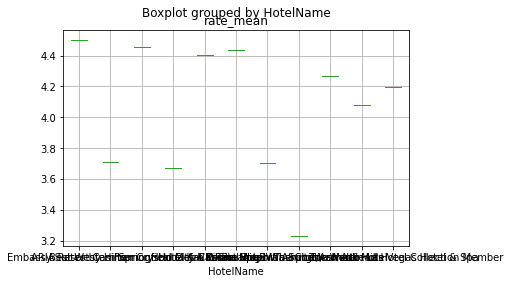

In [16]:
df50 = grouped_multiple[grouped_multiple['count'] >=80]
box1= df50.boxplot(column = 'rate_mean', by = 'HotelName')

In [17]:
grouped_multiple_y = data_NRY.groupby(['HotelName', 'ReviewYear']).agg({'Rate': ['count','mean', 'min', 'max']})
grouped_multiple_y.columns = ['count','rate_mean', 'rate_min', 'rate_max']
grouped_multiple_y = grouped_multiple_y.reset_index().sort_values(by='count', ascending=False)
print(grouped_multiple_y.head(5))

                                HotelName  ReviewYear  count  rate_mean  \
8                      ARIA Resort Casino        2016    126   4.555556   
2772     The Westin Las Vegas Hotel & Spa        2017    117   4.138034   
1821                         Kinzie Hotel        2016     60   4.319167   
1953  Metro Points Hotel-Washington North        2013     50   3.680000   
1118               Fremont Hotel & Casino        2017     49   3.612245   

      rate_min  rate_max  
8         1.00       5.0  
2772      1.45       5.0  
1821      1.65       5.0  
1953      1.00       5.0  
1118      1.45       5.0  


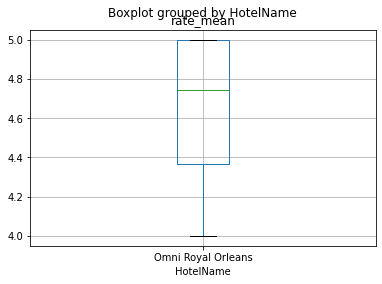

In [18]:
df50 = grouped_multiple_y[grouped_multiple_y['HotelName'] == 'Omni Royal Orleans']
box1= df50.boxplot(column = 'rate_mean', by = 'HotelName')

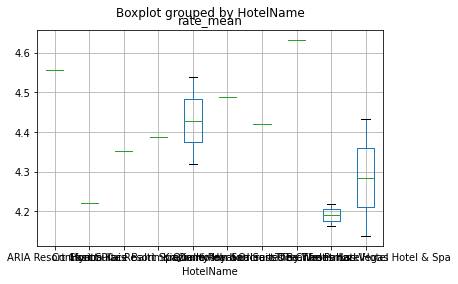

In [19]:
top20 = grouped_multiple_y[0:20]
df50 = top20[top20['rate_mean'] >=4]
box1= df50.boxplot(column = 'rate_mean', by = 'HotelName')


#box1= df50.boxplot(column = 'rate_mean', by = 'ReviewYear')

"\n\ngrouped_multiple_y = data_NRY.groupby(['HotelName', 'ReviewYear']).agg({'Rate': ['count','mean', 'min', 'max']})\ngrouped_multiple_y.columns = ['count','rate_mean', 'rate_min', 'rate_max']\ngrouped_multiple_y = grouped_multiple_y.reset_index().sort_values(by='count', ascending=False)\n\n"

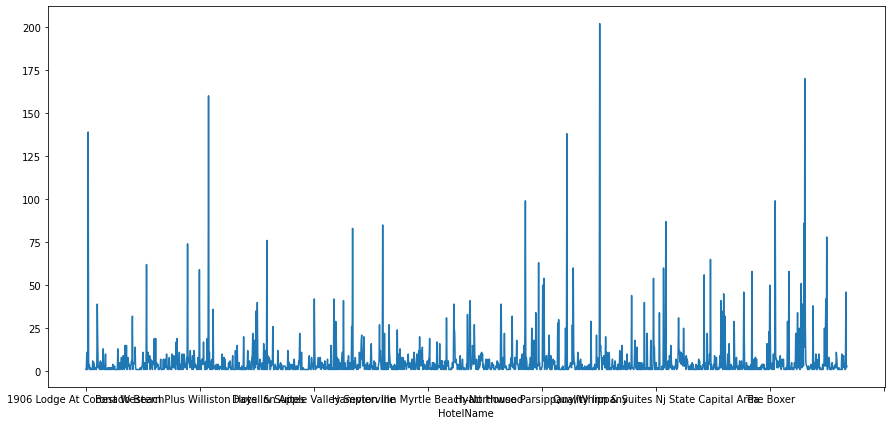

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
data_NRY.groupby(['HotelName']).count()['Rate'].plot(ax=ax)
### this shows that how the number of rating per each hotel differs


'''

grouped_multiple_y = data_NRY.groupby(['HotelName', 'ReviewYear']).agg({'Rate': ['count','mean', 'min', 'max']})
grouped_multiple_y.columns = ['count','rate_mean', 'rate_min', 'rate_max']
grouped_multiple_y = grouped_multiple_y.reset_index().sort_values(by='count', ascending=False)

'''

          HotelName  ReviewYear  Rate
2295  Hotel Lincoln        2016   4.0
2296  Hotel Lincoln        2016   4.0
2297  Hotel Lincoln        2016   4.0
2298  Hotel Lincoln        2016   5.0
2299  Hotel Lincoln        2016   4.0
2300  Hotel Lincoln        2016   5.0
2301  Hotel Lincoln        2016   5.0
2302  Hotel Lincoln        2016   3.0


<AxesSubplot:>

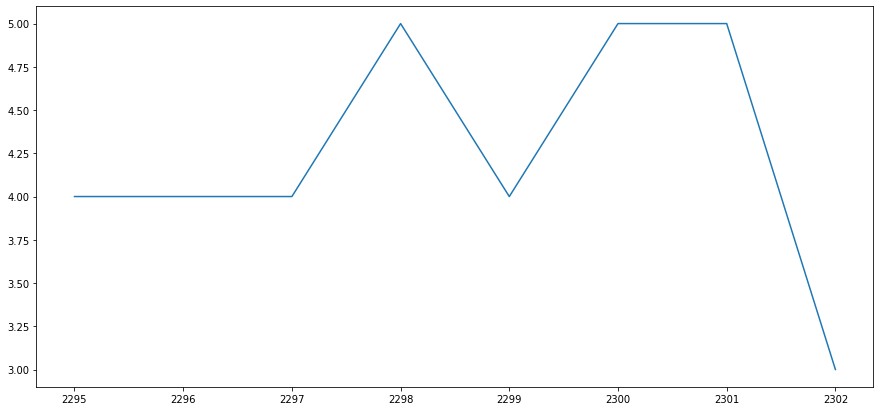

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
#data_NRY.groupby(['HotelName']).count()['ReviewYear'].plot(ax=ax)

df50 = data_NRY[data_NRY['HotelName'] == 'Hotel Lincoln']
print(df50)
#reviews_rating
df50['Rate'].plot(ax = ax)
#df50.count()['Rate'].plot(ax=ax)



In [22]:
grouped_multiple_y = data_NRY.groupby(['HotelName', 'ReviewYear']).agg({'Rate': ['count','mean', 'min', 'max']})
grouped_multiple_y.columns = ['count','rate_mean', 'rate_min', 'rate_max']
grouped_multiple_y = grouped_multiple_y.reset_index().sort_values(by='count', ascending=False)
print(grouped_multiple_y.head(5).HotelName, "\n")

8                        ARIA Resort Casino
2772       The Westin Las Vegas Hotel & Spa
1821                           Kinzie Hotel
1953    Metro Points Hotel-Washington North
1118                 Fremont Hotel & Casino
Name: HotelName, dtype: object 

